In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("trainingDataModified.csv")
answers = data["user"]
dataWOAnswers = data.drop(columns=("user"))
rawData = np.asarray(dataWOAnswers.values.tolist())

In [3]:
X = rawData
y = answers
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train.reshape(-1,1))
x_train_scaled = x_scaler.transform(X_train)
x_test_scaled = x_scaler.transform(X_test)

k: 1, Train/Test Score: 0.978/0.712
k: 3, Train/Test Score: 0.812/0.660
k: 5, Train/Test Score: 0.737/0.579
k: 7, Train/Test Score: 0.671/0.541
k: 9, Train/Test Score: 0.645/0.540
k: 11, Train/Test Score: 0.617/0.533
k: 13, Train/Test Score: 0.606/0.523
k: 15, Train/Test Score: 0.597/0.521
k: 17, Train/Test Score: 0.582/0.516
k: 19, Train/Test Score: 0.576/0.517


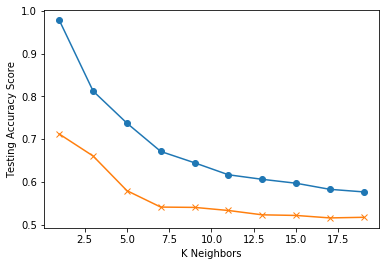

In [5]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    train_score = knn.score(x_train_scaled, y_train)
    test_score = knn.score(x_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.713
